# Implementation of Bisection Method

Date    : 02/01/2022 

Author  : Mukesh Tiwari

# f(a) < eps is not valid!!!
give example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
%matplotlib notebook

In [2]:
#Recursive Implementation

def bisection_recur(f , a , b ,eps):
    #check if the initial values a and b are valid
    assert a != b , 'Null Interval'
    assert f(a) * f(b) <= 0 , 'Function has same sign for both values'
    
    if abs(f(a)) < eps:
            return a
    if abs(f(b)) < eps:
            return b
        
    mid = (a + b) * 0.5
    
    if( abs(f(mid)) <= eps):
        return mid
    
    elif f(mid) * f(a) < 0:
        b = mid
        ans = bisection_recur(f,a,b,eps)
    elif f(mid) * f(b) < 0:
        a = mid
        ans = bisection_recur(f,a,b,eps)
       
    
    return ans
 
        

In [3]:
#conditional loop Implementation

def bisection_while(f , a , b ,eps):
    #check if the initial values a and b are valid
    assert a != b , 'Null Interval'
    assert f(a) * f(b) <= 0 , 'Function has same sign for both values'
    
    if abs(f(a)) < eps:
            return a
    elif abs(f(b)) < eps:
            return b
        
    mid = (a + b) * 0.5     
    while(abs(f(mid)) > eps):
        mid = (a + b) * 0.5 
        if f(mid) * f(a) < 0:
            b = mid
        elif f(mid) * f(b) < 0:
            a = mid
    return mid

In [4]:
#Imperative loop Implementation

def bisection_for(f , a , b ,eps):
    #check if the initial values a and b are valid
    assert a != b , 'Null Interval'
    assert f(a) * f(b) <= 0 , 'Function has same sign for both values'
    
    if abs(f(a)) < eps:
            return a
    elif abs(f(b)) < eps:
            return b
    
    n = math.ceil(math.log(abs(a-b) / eps) / math.log(2))
    
    for i in range(0 , n+1):
        mid = (a + b) * 0.5 
        if f(mid) * f(a) < 0:
            b = mid
        elif f(mid) * f(b) < 0:
            a = mid
    return mid

Algorithm for getting initial points


In [5]:
sign = lambda x: -1 if x < 0 else 1 

In [6]:
def get_initial_points(f):
    for i in range(1,10):
        x_vals = [random.randrange(-10*(2**i) , 10*(2**i)) for k in range(0,100*i)]
        x_sgn = [sign(i) for i in x_vals]
        if np.prod(x_sgn) == -1 :
            break
    
    for i in x_vals:
        for j in x_vals:
            if f(i)*f(j) < 0:
                return i,j
            

## verification 1

In [7]:
def func1(x):
    return (x**2 - 4)


<IPython.core.display.Javascript object>


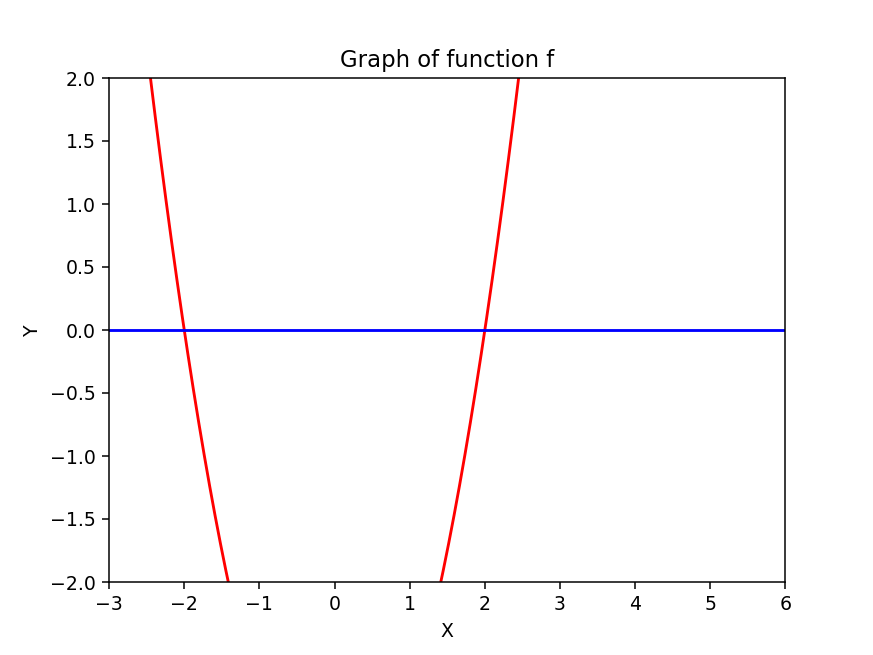

In [8]:
x_val = np.linspace(-3,6,250)
y_val = func1(x_val)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
graph = axes.plot(x_val , y_val , 'r')
x_axis = axes.plot(x_val,np.zeros(np.size(x_val)),'b')
axes.set_xlabel("X")
axes.set_ylabel("Y")
axes.set_title("Graph of function f")
axes.set_xlim([-3, 6])
axes.set_ylim([-2, 2])
plt.show()

In [9]:
a,b = get_initial_points(func1)
print(min(a,b) , max(a,b))
print(bisection_recur(func1 , min(a,b) , max(a,b) , 0.00001))
print(bisection_while(func1 , min(a,b) , max(a,b) , 0.00001))
print(bisection_for(func1 , min(a,b) , max(a,b) , 0.00001))

-120 -1
-1.9999999403953552
-1.9999999403953552
-2.0000034868717194


In [10]:
ans = bisection_recur(func1 , 0 , 5 , 0.00001)
print(ans)

1.9999980926513672


In [11]:
ans = bisection_while(func1 , 0 , 5 , 0.00001)
print(ans)

1.9999980926513672


In [12]:
ans = bisection_for(func1 , 0 , 5 , 0.00001)
print(ans)
print(ans - 2)

2.000002861022949
2.86102294921875e-06


# # verification 2

In [10]:
def func2(x):
    return (x**3 - x - 1)

<IPython.core.display.Javascript object>


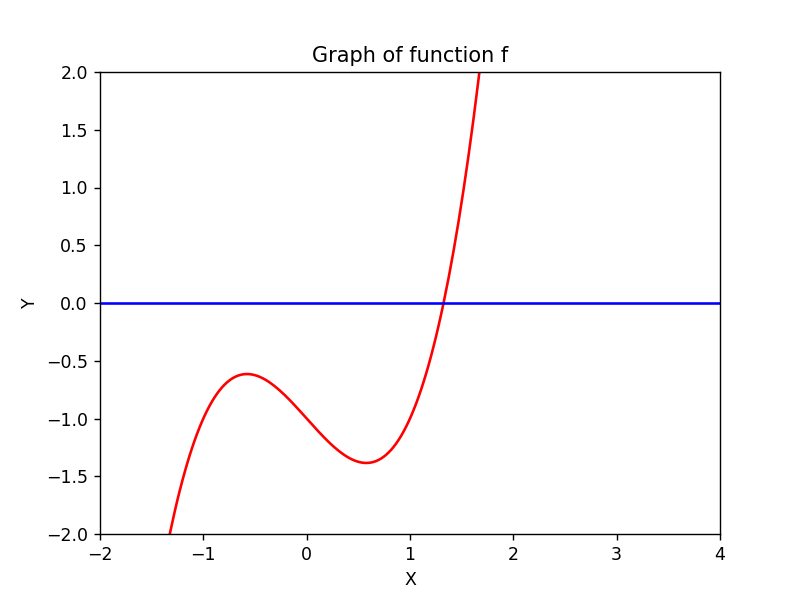

In [168]:
x_val = np.linspace(-2,4,250)
y_val = func2(x_val)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
graph = axes.plot(x_val , y_val , 'r')
x_axis = axes.plot(x_val,np.zeros(np.size(x_val)),'b')
axes.set_xlabel("X")
axes.set_ylabel("Y")
axes.set_title("Graph of function f")
axes.set_xlim([-2, 4])
axes.set_ylim([-2, 2])
plt.show()

In [180]:
a,b = get_initial_points(func2)
print(min(a,b) , max(a,b))
print(bisection_recur(func2 , min(a,b) , max(a,b) , 0.00001))
print(bisection_recur(func2 , min(a,b) , max(a,b) , 0.00001))
print(bisection_recur(func2 , min(a,b) , max(a,b) , 0.00001))

-36 11
1.3247191905975342
1.3247191905975342
1.3247191905975342


In [171]:
ans = bisection_recur(func2 , 0 , 5 , 0.00000001)
print(ans)

1.3247179565951228


In [13]:
ans = bisection_while(func2 , 0 , 5 , 0.00000001)
print(ans)

1.3247179565951228


In [14]:
ans = bisection_for(func2 , 0 , 5 , 0.000000001)
print(ans)

1.3247179574682377


# # verification 3

In [15]:
def func3(x):
    return (x * np.e ** x - 1)

<IPython.core.display.Javascript object>


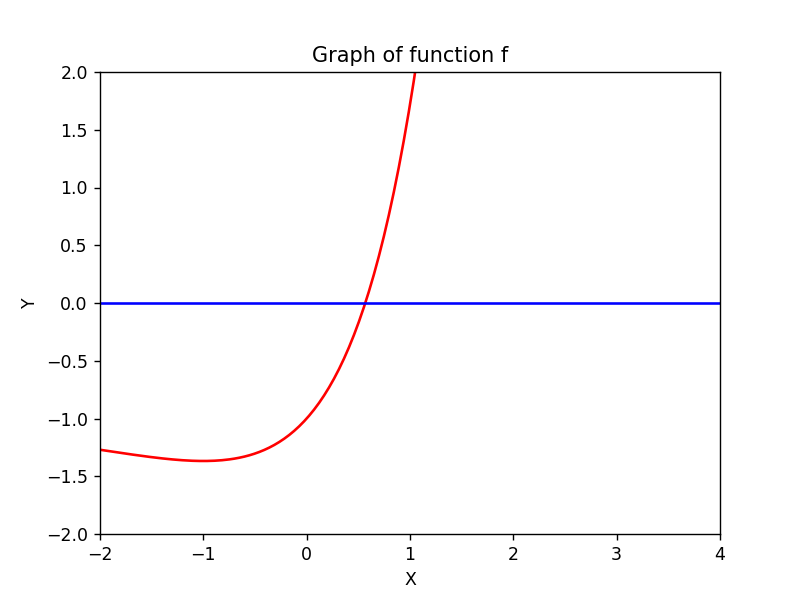

In [181]:
x_val = np.linspace(-2,4,250)
y_val = func3(x_val)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
graph = axes.plot(x_val , y_val , 'r')
x_axis = axes.plot(x_val,np.zeros(np.size(x_val)),'b')
axes.set_xlabel("X")
axes.set_ylabel("Y")
axes.set_title("Graph of function f")
axes.set_xlim([-2, 4])
axes.set_ylim([-2, 2])
plt.show()

In [182]:
a,b = get_initial_points(func3)
print(min(a,b) , max(a,b))
print(bisection_recur(func3 , min(a,b) , max(a,b) , 0.00001))
print(bisection_recur(func3 , min(a,b) , max(a,b) , 0.00001))
print(bisection_recur(func3 , min(a,b) , max(a,b) , 0.00001))

0 12
0.5671463012695312
0.5671463012695312
0.5671463012695312


In [17]:
ans = bisection_recur(func3 , 0 , 5 , 0.0005)
print(ans)

0.5670166015625


In [18]:
ans = bisection_while(func3 , 0 , 5 , 0.0005)
print(ans)

0.5670166015625


In [19]:
ans = bisection_for(func3 , 0 , 5 , 0.0005)
print(ans)

0.567169189453125
